<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Statistics Fundamentals

_Instructor:_ Martin Skarzynski, General Assembly DC

---

<a id="learning-objectives"></a>
## Learning Objectives
- **Linear algebra:** Dot products, matrix multiplications, and vector norms by hand and using NumPy.
- **Summary statistics:** Using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.
- **Discover trends:** Using basic summary statistics and viz.
- **Bias/variance tradeoff:** Describe the bias and variance of statistical estimators.
- **Identify a normal distribution** within a data set using summary statistics and data visualizations.

### Lesson Guide
- [Where Are We in the Data Science Workflow?](#where-are-we-in-the-data-science-workflow)
- [Linear Algebra Review](#linear-algebra-review)
    - [Scalars, Vectors, and Matrices](#scalars-vectors-and-matrices)
	- [Basic Matrix Algebra](#basic-matrix-algebra)
	- [Dot Product](#dot-product)
	- [Matrix Multiplication](#matrix-multiplication)
	- [N-Dimensional Space](#n-dimensional-space)
	- [Vector Norm](#vector-norm)
- [Linear Algebra Applications to Machine Learning](#linear-algebra-applications-to-machine-learning)
	- [Distance Between Actual Values and Predicted Values](#distance-between-actual-values-and-predicted-values)
	- [Mean Squared Error](#mean-squared-error)
	- [Least Squares](#least-squares)
- LESSON BREAK
- [Code-Along: Examining the Titanic Data Set](#codealong-examining-the-titanic-dataset)
- [Descriptive Statistics Fundamentals](#descriptive-statistics-fundamentals)
	- [Measures of Central Tendency](#measures-of-central-tendency)
	- [Math Review](#math-review)
	- [Measures of Dispersion: Standard Deviation and Variance](#measures-of-dispersion-standard-deviation-and-variance)
- [The Normal Distribution](#the-normal-distribution)
	- [What is the Normal Distribution?](#what-is-the-normal-distribution)
	- [Skewness](#skewness)
	- [Kurtosis](#kurtosis)
- [Determining the Distribution of Your Data](#determining-the-distribution-of-your-data)
	- [Exercise](#exercise)
- [Lesson Review](#topic-review)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook.
%matplotlib inline

<a id="linear-algebra-review"></a>
## Linear Algebra Review
---
**Objective:** Compute dot products, matrix multiplications, and vector norms by hand and using NumPy.

<a id="why-linear-algebra"></a>
## Why Use Linear Algebra in Data Science?

Linear models are efficient and well understood. They can often closely approximate nonlinear solutions, and they scale to high dimensions without difficulty.

Because linear models are so prevalent, we should study them in-depth. **Linear models are all based on linear algebra**, so we should know that too.

Actually, most advanced models rely on linear algebra too. Principal components analysis can really only be explained in terms of linear algebra. Advanced models such as neural nets and support vector machines rely on linear algebra to work at all. Modern GPUs are basically linear algebra machines and can therefore be used to speed up complicated models.

Furthermore, even the complicated models rely on the basic models, which in turn rely heavily on linear algebra. There is no avoiding this topic. _**Eat your vegetables.**_

Although we do not have time in this course to comprehensively discuss linear algebra, we highly recommend you become fluent!

<a id="scalars-vectors-and-matrices"></a>
## Vocab: Scalars, Vectors, and Matrices

A **scalar** is a single number. Here, symbols that are lowercase single letters refer to scalars. For example, the symbols $a$ and $v$ are scalars that might refer to arbitrary numbers such as $5.328$ or $7$. An example scalar would be:

$$a$$

A **vector** is an ordered sequence of numbers. Here, symbols that are lowercase single letters with an arrow — such as $\vec{u}$ — refer to vectors. (Or, often written as $\mathbf{u}$). An example vector would be:

$$\vec{u} = \left[ \begin{array}{c}
1&3&7
\end{array} \right]$$

_Note:_ It's usually easy to consider vectors as either a $1 \times n$ or $n \times 1$ "row" or "column" vector, where convenient.

In [3]:
# Create a vector using np.array.
u = [1,3,7]
np.array(u)

array([1, 3, 7])

An $m$ x $n$ **matrix** is a rectangular array of numbers with $m$ rows and $n$ columns. Each number in the matrix is an entry. Entries can be denoted $a_{ij}$, where $i$ denotes the row number and $j$ denotes the column number. Note that, because each entry $a_{ij}$ is a lowercase single letter, a matrix is an array of scalars:

$$\mathbf{A}= \left[ \begin{array}{c}
a_{11} & a_{12} & \cdots & a_{1n}  \\
a_{21} & a_{22} & \cdots & a_{2n}  \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{array} \right]$$

Matrices are referred to using bold uppercase letters, such as $\mathbf{A}$. A bold font face is used to distinguish matrices from sets. (Sometimes, not always).

In [4]:
# Create a matrix using np.array. ndarray is a class. rows and columns, 2x3 matrix 
np.array([[1,3,7], [4,6,8], [5,9,12]])

array([[ 1,  3,  7],
       [ 4,  6,  8],
       [ 5,  9, 12]])

In [5]:
#function to make a matrix of 0s or 1s or any variable. convenience functions
np.zeros()#(rows, columns)
np.one()#(rows, columns)
np.eyes()#eye for identity 
np.full() #(rows, columns), variable)


TypeError: zeros() missing required argument 'shape' (pos 1)

In [6]:
np.array([i for i in range(9)])

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [7]:
np.array([[i, i+1, i+3] for i in range(9)]) #returns a nested list

array([[ 0,  1,  3],
       [ 1,  2,  4],
       [ 2,  3,  5],
       [ 3,  4,  6],
       [ 4,  5,  7],
       [ 5,  6,  8],
       [ 6,  7,  9],
       [ 7,  8, 10],
       [ 8,  9, 11]])

In [8]:
np.array([[i, i+1, i**2] for i in range(9)]) #returns a nested list

array([[ 0,  1,  0],
       [ 1,  2,  1],
       [ 2,  3,  4],
       [ 3,  4,  9],
       [ 4,  5, 16],
       [ 5,  6, 25],
       [ 6,  7, 36],
       [ 7,  8, 49],
       [ 8,  9, 64]])

In [9]:
np.eye(3,3) #default dtype is float, that is why it's a decimal 

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
pd.Series([1, np.nan, 3])

0    1.0
1    NaN
2    3.0
dtype: float64

In [11]:
pd.Series([True, 1, .5, "string", [1,2,4]])

0         True
1            1
2          0.5
3       string
4    [1, 2, 4]
dtype: object

Note that in Python, a matrix is just a list of lists converted to a numpy array! The outermost list is a list of rows.

<a id="basic-matrix-algebra"></a>
### Basic Matrix Algebra


#### Addition and Subtraction
Vector **addition** is straightforward. If two vectors are of equal dimensions (The vectors are shown here as column vectors for convenience only):

$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right],  \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$

In [12]:
v = np.array([1, 3, 7])
w = np.array([1, 0, 1])

$\vec{v} + \vec{w} =
\left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] + \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right] = 
\left[ \begin{array}{c}
1+1 \\
3+0 \\
7+1
\end{array} \right] = 
\left[ \begin{array}{c}
2 \\
3 \\
8
\end{array} \right]
$

(Subtraction is similar.)

In [13]:
# Add the vectors together with +.
v + w

array([2, 3, 8])

In [14]:
# Subtract the vectors together with -.
v - w

array([0, 3, 6])

In [15]:
w - v

array([ 0, -3, -6])

In [16]:
w +1 #scaler addition, adds to every element 

array([2, 1, 2])

#### Scalar Multiplication
We scale a vector with **scalar multiplication**, multiplying a vector by a scalar (single quantity):

$ 2 \cdot \vec{v} = 2\left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] = 
 \left[ \begin{array}{c}
2 \cdot 1 \\
2 \cdot 3 \\
2 \cdot 7
\end{array} \right] = 
 \left[ \begin{array}{c}
2 \\
6 \\
14
\end{array} \right]$ 

In [17]:
# Multiply v by 2.
v *2

array([ 2,  6, 14])

In [18]:
v * w

array([1, 0, 7])

<a id="dot-product"></a>
### Dot Product
The **dot product** of two _n_-dimensional vectors is:

$ \vec{v} \cdot \vec{w} =\sum _{i=1}^{n}v_{i}w_{i}=v_{1}w_{1}+v_{2}w_{2}+\cdots +v_{n}w_{n} $

So, if:

$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right], \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$

$ \vec{v} \cdot \vec{w} = 1 \cdot 1 + 3 \cdot 0 + 7 \cdot 1 = 8 $

_Tim Note:_ When considering vectors as "column vectors", you will often see a dot product written as $\mathbf{v}^T\mathbf{w}$. In more pure-math based literature, you might even see $\langle v, w \rangle$.

In [19]:
# Calculate the dot product of v and w using np.dot. get scaler as anwser
np.dot(v,w)

8

In [ ]:
#np.dot() is the way neural networks conduct probability

<a id="matrix-multiplication"></a>
### Matrix Multiplication
**Matrix multiplication**, $\mathbf{AB}$, is valid when the left matrix has the same number of columns as the right matrix has rows. Each entry is the dot product of corresponding row and column vectors.

![](assets/images/matrix-multiply-a.gif)
(Image: mathisfun.com!)

The dot product illustrated above is: $1 \cdot 7 + 2 \cdot 9 + 3 \cdot 11 = 58$. Can you compute the rest of the dot products by hand?

If the product is the $2$ x $2$ matrix $\mathbf{C}$, then:

_Martin, do on board!_

In [20]:
# Multiply the two above matrices
np.dot(v,w)

8

In [21]:
a = np.array([[1, 2, 3],[4, 5, 6]])
b = np.array([[7, 8],[9, 10],[11, 12]])

In [22]:
a 

array([[1, 2, 3],
       [4, 5, 6]])

In [23]:
b

array([[ 7,  8],
       [ 9, 10],
       [11, 12]])

In [24]:
np.dot(a,b)

array([[ 58,  64],
       [139, 154]])

In [25]:
a@b #matrix at matrix gives the dot product. np syntax

array([[ 58,  64],
       [139, 154]])

In [26]:
!python --version 

Python 3.7.3


In [27]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

<a id="n-dimensional-space"></a>
### N-Dimensional Space

We often refer to vectors as elements of an $n$-dimensional space. The symbol $\mathbb{R}$ refers to the set of all real numbers (written in uppercase "blackboard bold" font). Because this contains all reals, $3$ and $\pi$ are **contained in** $\mathbb{R}$. We often write this symbolically as $3 \in \mathbb{R}$ and $\pi \in \mathbb{R}$.

To get the set of all pairs of real numbers, we would essentially take the product of this set with itself (called the Cartesian product) — $\mathbb{R}$ x $\mathbb{R}$, abbreviated as $\mathbb{R}^2$. This set — $\mathbb{R}^2$ — contains all pairs of real numbers, so $(1, 3)$ is **contained in** this set. We write this symbolically as $(1, 3) \in \mathbb{R}^2$.

+ In 2-D space ($\mathbb{R}^2$), a point is uniquely referred to using two coordinates: $(1, 3) \in \mathbb{R}^2$.
+ In 3-D space ($\mathbb{R}^3$), a point is uniquely referred to using three coordinates: $(8, 2, -3) \in \mathbb{R}^3$.
+ In $n$-dimensional space ($\mathbb{R}^n$), a point is uniquely referred to using $n$ coordinates.

Note that these coordinates of course are isomorphic to our vectors! After all, coordinates are ordered sequences of numbers, just as we define vectors to be ordered sequences of numbers. So, especially in machine learning, we often visualize vectors of length $n$ as points in $n$-dimensional space.

<a id="vector-norm"></a>
### Vector Norm (Martin, do some more drawings!)

The **magnitude** of a vector, $\vec{v} \in \mathbb{R}^{n}$, can be interpreted as its length in $n$-dimensional space. Therefore it is calculable via the Euclidean distance from the origin:

$\vec{v} = \left[ \begin{array}{c}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array} \right]$

then $\| \vec{v} \| = \sqrt{v_{1}^{2} + v_{2}^{2} + ... + v_{n}^{2}}$

E.g. if $\vec{v} = 
\left[ \begin{array}{c}
3 \\
4
\end{array} \right]$, then $\| \vec{v} \| = \sqrt{3^{2} + 4^{2}} = 5$

This is also called the vector **norm**. You will often see this used in machine learning.

In [28]:
np.sqrt(3**2+4**2) #square root method 

5.0

In [29]:
# Calculate the norm of the vector x with np.linalg.norm.
np.linalg.norm((3,4))

5.0

<a id="linear-algebra-applications-to-machine-learning"></a>
## Linear Algebra Applications Machine Learning
---

<a id="distance-between-actual-values-and-predicted-values"></a>
### Distance Between Actual Values and Predicted Values
We often need to know the difference between predicted values and actual values. That is:
$$\| \vec{actual} - \vec{predicted} \| =\sqrt{(actual_1 - predicted_1)^2 + (actual_2 - predicted_2)^2 + \cdots}$$

Note that this is just the straight-line distance between the actual point and the predicted point.

<a id="mean-squared-error"></a>
### Mean Squared Error
Often, it's easier to look at the mean of the squared errors. Where $\hat{\mathbf{y}}$ is a vector of predicted values (a function of the data matrix $\mathbf{X}$) and $\mathbf{y}$ is the actual values:

$$MSE = \frac{1} {n} \| \hat{\mathbf{y}} - \mathbf{y} \|^2$$

<a id="least-squares"></a>
### Least squares
Many machine learning models are based on the following form:

$$\min \| \hat{\mathbf{y}} - \mathbf{y} \|^2$$

The goal is to minimize the distance between model predictions and actual data.

# BREAK HERE FOR VIZ LESSON, COME BACK AFTER!

<a id="codealong-examining-the-titanic-dataset"></a>
## Code-Along: Examining the Titanic Data Set

---

#### Objective: Read in the Titanic data and look at a few summary statistics.

In [30]:
# Import Pandas
import pandas as pd

In [31]:
titanic = pd.read_csv('data/titanic.csv')

In [32]:
titanic.values

array([[0, 3, 'Braund, Mr. Owen Harris', ..., 7.25, nan, 'S'],
       [1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', ...,
        71.2833, 'C85', 'C'],
       [1, 3, 'Heikkinen, Miss. Laina', ..., 7.925, nan, 'S'],
       ...,
       [0, 3, 'Johnston, Miss. Catherine Helen "Carrie"', ..., 23.45,
        nan, 'S'],
       [1, 1, 'Behr, Mr. Karl Howell', ..., 30.0, 'C148', 'C'],
       [0, 3, 'Dooley, Mr. Patrick', ..., 7.75, nan, 'Q']], dtype=object)

In [33]:
type(titanic.values)

numpy.ndarray

#### Print out the column names:

In [34]:
# Answer:
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [35]:
pd.DataFrame?

#Init signature: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
Docstring:     
Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure.

SyntaxError: invalid syntax (<ipython-input-35-4b33a0e72fc7>, line 4)

#### Print out the dimensions of the DataFrame using the `.shape` attribute:

In [36]:
# Preview data dimensions.
titanic.shape

(891, 11)

#### Print out the data types of the columns using the `.dtypes` attribute:

In [37]:
# What are the column data types
type(titanic)

pandas.core.frame.DataFrame

In [38]:
titanic.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [39]:
titanic.select_dtypes(["int", "float"]).dtypes

age     float64
fare    float64
dtype: object

In [40]:
titanic.dtypes.head()

survived      int64
pclass        int64
name         object
sex          object
age         float64
dtype: object

#### Print out the first five rows of the data using the built-in `.head()` function:

In [41]:
# Look at the first five rows.
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Use the built-in  `.value_counts()` function to count the values of each type in the `pclass` column:

In [42]:
# Count the values of the plcass variable.
titanic.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [43]:
titanic.pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64

In [44]:
titanic.pclass.value_counts(normalize=True).round(2)*100 #scaler multiplication of a vector, scaler is 100

3    55.0
1    24.0
2    21.0
Name: pclass, dtype: float64

#### Pull up descriptive statistics for each variable using the built-in `.describe()` function:

In [45]:
# Pull up descriptive statistics for each variable.
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
titanic.isna().sum()
#shows the missing values

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [47]:
titanic.shape

(891, 11)

### Diagnosing Data Problems

- Whenever you get a new data set, the fastest way to find mistakes and inconsistencies is to look at the **descriptive statistics**.
  - If anything looks too high or too low relative to your experience, there may be issues with the data collection.
- Your data may contain a lot of **missing values** and may need to be cleaned meticulously before they can be combined with other data.
  - You can take a quick average or moving average to smooth out the data and combine that to preview your results before you embark on your much longer data-cleaning journey.
  - Sometimes filling in missing values with their means or medians will be the best solution for dealing with missing data. Other times, you may want to drop the offending rows or do real imputation.

<a id="descriptive-statistics-fundamentals"></a>
## Descriptive Statistics Fundamentals
---

- **Objective:** Code summary statistics using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.

### A Quick Review of Notation

The sum of a constant, $k$, $n$ times:
$$\sum_{i=1}^nk$$

$\sum_{i=1}^nk$
#The sum of each element in x is this ^^^^:

$x^0$

In [ ]:
# k + k + k + k + ... + k

In [48]:
k = 2
i = 1
n = 3 
for _ in range (1, n+1):
    k += 2
    

In [49]:
k 

8

In [50]:
k = 1
i = 1
n = 3 
for _ in range (1, n+1):
    k += 2

In [51]:
k #start at 1. plus 3, plus 3 

7

The sum of all numbers from 1 up to and including $n$:
$$\sum_{i=1}^ni$$

In [ ]:
# 1 + 2 + 3 + ... + n

The sum of all $x$ from the first $x$ entry to the $n$th $x$ entry:
$$\sum_{i=0}^nx_i$$

In [52]:
x = np.array([3, 5, 9, 0, 2])

In [53]:
x

array([3, 5, 9, 0, 2])

In [54]:
c = 0
for i in x:
    c+= i
c

19

In [55]:
x.sum()

19

In [56]:
c = 0
for i in range (len(x)):
    c+= x[i]
c

19

In [ ]:
# x_1 + x_2 + x_3 + ... + x_n

#### Code-Along

_Optional: Write down the mathematical notation for the following questions:_

In [57]:
# Compute the sum of seven 4s using base Python.
np.full((1,7), 4)

array([[4, 4, 4, 4, 4, 4, 4]])

In [58]:
c = 0 #counter
s = 0 #sum
for i in list("4"*7):
    s+=int(i)

In [59]:
c

0

In [60]:
s

28

In [61]:
s =0
for i in [4]*7:
    s+= i

s

28

In [62]:
# Compute the sum of seven 4s using NumPy.
np.full((1,7), 4).sum()

28

In [63]:
# Compute the sum of 1 through 10 using base Python.
i = 1
n = 4
c = 0

for i in range(i, n+1):
    c+= i
    i += 1

In [64]:
c

10

In [65]:
sum(range(1,5))

10

In [66]:
# Using the titanic.fare column, compute the total fare paid by passengers.
titanic.fare

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: fare, Length: 891,

In [67]:
titanic.fare.sum()

28693.9493

In [68]:
titanic.fare.mean()

32.2042079685746

In [69]:
titanic.fare.mode()

0    8.05
dtype: float64

In [70]:
titanic.fare.median()

14.4542

<a id="measures-of-central-tendency"></a>
### Measures of Central Tendency

- Mean
- Median
- Mode

#### Mean
The mean is defined as:
$$\bar{x} =\frac 1n\sum_{i=1}^nx_i$$

It is determined by summing all data points in a population and then dividing the total by the number of points. The resulting number is known as the mean or the average.

Be careful — the mean can be highly affected by outliers. For example, the mean of a very large number and some small numbers will be much larger than the "typical" small numbers. Earlier, we saw that the mean squared error (MSE) was used to optimize linear regression. Because this mean is highly affected by outliers, the resulting linear regression model is, too.

We say the mean is **sensitive** to outliers.

#### Median
The median refers to the midpoint in a series of numbers. Notice that the median is not affected by outliers, so it more so represents the "typical" value in a set.

$$ 0,1,2,[3],5,5,1004 $$

$$ 1,3,4,[4,5],5,5,7 $$

Although the median has many useful properties, the mean is easier to use in optimization algorithms. The median is more often used in analysis than in machine learning algorithms.

The median isn't really affected by a few outliers. We say the median is **resistant** to outliers.

#### Mode
The mode of a set of values is the value that occurs most often.
A set of values may have more than one mode, or no mode at all.

$$1,0,1,5,7,8,9,3,4,1$$ 

$1$ is the mode, as it occurs the most often (three times).

In [71]:
titanic.median()

survived     0.0000
pclass       3.0000
age         28.0000
sibsp        0.0000
parch        0.0000
fare        14.4542
dtype: float64

In [72]:
titanic.age.median()

28.0

In [73]:
titanic.age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [74]:
len(titanic) #gives number of rows

891

In [75]:
titanic.shape[0] #gives number of rows

891

#### Code-Along

In [76]:
titanic.describe(include="object")

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Millet, Mr. Francis Davis",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [77]:
# Find the mean of the titanic.fare series using base Python:
titanic.fare.mean()

32.2042079685746

In [78]:
type(titanic.fare.mean())

float

In [79]:
titanic.fare.mean().round(2)
#only works as of pandas 0.25

AttributeError: 'float' object has no attribute 'round'

In [80]:
round((titanic.fare.mean())2)

SyntaxError: invalid syntax (<ipython-input-80-4f4e0f5da395>, line 1)

In [81]:
# Find the mean of the titanic.fare series using NumPy:
np.mean(titanic.fare)

32.2042079685746

In [82]:
titanic.iloc[:,8]

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: fare, Length: 891,

In [83]:
titanic.values[...,8]

array([7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333,
       30.0708, 16.7, 26.55, 8.05, 31.275, 7.8542, 16.0, 29.125, 13.0,
       18.0, 7.225, 26.0, 13.0, 8.0292, 35.5, 21.075, 31.3875, 7.225,
       263.0, 7.8792, 7.8958, 27.7208, 146.5208, 7.75, 10.5, 82.1708,
       52.0, 7.2292, 8.05, 18.0, 11.2417, 9.475, 21.0, 7.8958, 41.5792,
       7.8792, 8.05, 15.5, 7.75, 21.6792, 17.8, 39.6875, 7.8, 76.7292,
       26.0, 61.9792, 35.5, 10.5, 7.2292, 27.75, 46.9, 7.2292, 80.0,
       83.475, 27.9, 27.7208, 15.2458, 10.5, 8.1583, 7.925, 8.6625, 10.5,
       46.9, 73.5, 14.4542, 56.4958, 7.65, 7.8958, 8.05, 29.0, 12.475,
       9.0, 9.5, 7.7875, 47.1, 10.5, 15.85, 34.375, 8.05, 263.0, 8.05,
       8.05, 7.8542, 61.175, 20.575, 7.25, 8.05, 34.6542, 63.3583, 23.0,
       26.0, 7.8958, 7.8958, 77.2875, 8.6542, 7.925, 7.8958, 7.65, 7.775,
       7.8958, 24.15, 52.0, 14.4542, 8.05, 9.825, 14.4583, 7.925, 7.75,
       21.0, 247.5208, 31.275, 73.5, 8.05, 30.0708, 13.0, 77.2875,


In [84]:
np.mean(titanic)

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

In [85]:
# Find the mean of the titanic.fare series using Pandas:
titanic.fare.mean()

32.2042079685746

In [86]:
# What was the median fare paid (using Pandas)?
titanic.fare.median()

14.4542

In [87]:
# Use Pandas to find the most common fare paid on the Titanic:
titanic.fare.mode()

0    8.05
dtype: float64

<a id="measures-of-dispersion-standard-deviation-and-variance"></a>
### Measures of Dispersion: Standard Deviation and Variance

Standard deviation (SD, $σ$ for population standard deviation, or $s$ for sample standard deviation) is a measure that is used to quantify the amount of variation or dispersion from the mean of a set of data values. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are spread out.

Standard deviation is the square root of variance:

$$\text{variance} = s^2 = \frac {\sum{(x_i - \bar{x})^2}} {n-1}$$

$$s = \sqrt{\frac {\sum{(x_i - \bar{x})^2}} {n-1}}$$

> **Standard deviation** is often used because it is in the same units as the original data! By glancing at the standard deviation, we can immediately estimate how "typical" a data point might be by how many standard deviations it is from the mean. Furthermore, standard deviation is the only value that makes sense to visually draw alongside the original data.

> **Variance** is often used for efficiency in computations. The square root in the SD always increases with the function to which it is applied. So, removing it can simplify calculations (e.g., taking derivatives), particularly if we are using the variance for tasks such as optimization.

**That can be a lot to take in, so let's break it down in Python.**

#### Assign the first 5 rows of titanic age data to a variable:

In [88]:
# Take the first five rows of titanic age data.
titanic.age[:5]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

#### Calculate the mean by hand:

In [89]:
# Calculate mean by hand.
titanic.age[:5].sum() / 5

31.2

In [90]:
len(titanic.age[:5])

5

#### Calculate the variance by hand:

$\text{variance} = s^2 = \frac {\sum{(x_i - \bar{x})^2}} {n-1}$

In [91]:
first_five = titanic.age[:5]

In [92]:
# Calculate variance by hand
def my_variance(vector):
    vector_mean = sum(vector) / len(vector) #xbar 
    c = 0 #counter/collector
    for i in vector:
        c += np.square(i - vector_mean)  #x is a vector
    return c / (len(vector) -1)

In [93]:
my_variance(first_five)

46.699999999999996

#### Calculate the variance and the standard deviation using Pandas:

In [94]:
# Verify with Pandas
first_five = titanic.age[:5]

In [95]:
first_five.var()

46.699999999999996

In [96]:
first_five.std()

6.833739825307955

In [97]:
np.sqrt(first_five.var())

6.833739825307955

<a id="our-first-model"></a>
## Our First Model
---

In this section, we will make a **mathematical model** of data. When we say **model**, we mean it in the same sense that a map is a **model** of the real world. Google Maps can get us to that restaurant without getting lost, but it can't tell us where each individual pothole is. This is good enough.

<img src="http://www.azquotes.com/picture-quotes/quote-all-models-are-wrong-but-some-are-useful-george-e-p-box-53-42-27.jpg">

In data science, we might take a rich, complex person and model that person solely as a two-dimensional vector: _(high school GPA, SAT score)_. For example: $(3.7, 1450)$, $(3.0, 1200)$, and $(2.8, 1050)$. This model of a complex person obviously fails to account for many things. However, if we primarily care about modeling college success, it might provide valuable insight.

Now that we have superficially modeled a complex person, we might determine a formula that evaluates college GPA. For example a student who did well in high school and had a high SAT score will likely do better in college. There are other factors at play, but _**this is just a model**_. 

## The Null Model
Let's make our first model from scratch. We'll use it predict the `fare` column in the Titanic data. So what data will we use? Actually, none.

The simplest model we can build is an estimation of the mean, median, or most common value. If we have no feature matrix and only an outcome, this is the best approach to make a prediction using only empirical data. 

This seems silly, but we'll actually use it all the time to create a baseline of how well we do with no data and determine whether or not our more sophisticated models make an improvement. This will be called the **null model**, since it uses no information from our $x$-data.

#### Get the `fare` column from the Titanic data and store it in variable `y`:

In [98]:
# Get the fare column from the Titanic data and store it as y:
y = titanic.fare

#### Create predictions `y_pred` (in this case just the mean of `y`):

In [99]:
# Stored predictions in y_pred:
y_pred = y.mean()

#### Find the average squared distance between each prediction and its actual value:

This is known as the mean squared error (MSE).

### Mean Squared Error
Often, it's easier to look at the mean of the squared errors. Where $\hat{\mathbf{y}}$ is a vector of predicted values (a function of the data matrix $\mathbf{X}$) and $\mathbf{y}$ is the actual values:

$$MSE = \frac{1} {n} \| \hat{\mathbf{y}} - \mathbf{y} \|^2$$

In [ ]:
# Squared error is hard to read; let's look at mean squared error:
def mse(predictions, targets):
    return np.sqrt(((predictions - targets)).mean())

In [ ]:
mse(y_pred , y)

In [100]:
#Martin's Anwser , MSE
np.mean(np.square(y- y_pred))

2466.6653116850434

#### Calculate the root mean squared error (RMSE), the square root of the MSE:

In [ ]:
# 

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [101]:
#Martin's Anwser , RMSE
np.sqrt(np.mean(np.square(y- y_pred)))

49.66553444477411

## Normal Distribution

<a id="what-is-the-normal-distribution"></a>
### What is the Normal Distribution?
- A normal distribution is often a key assumption to many models.
  - In practice, if the normal distribution assumption is not met, it's not the end of the world. Your model is just less efficient in most cases.

- The normal distribution is **completely summarized by its mean and standar deviation**.

- The **mean** controls its **center**.

- The **standard deviation** controls how **spread out** it is.

- Normal distributions are **symmetric, bell-shaped curves**.

![normal distribution](assets/images/normal.png)


#### Why do we care about normal distributions?

- They often show up in nature.
- Aggregated processes tend to distribute normally, regardless of their underlying distribution (**Central Limit Theorem**!!!)
- They offer effective simplification that makes it easy to make approximations.

#### Plot a histogram of 1,000 samples from a random normal distribution:

The `np.random.randn(numsamples)` function will draw from a random normal distribution with a mean of 0 and a standard deviation of 1.

- To plot a histogram, pass a NumPy array with 1000 samples as the only parameter to `plt.hist()`.
- Change the number of bins using the keyword argument `bins`, e.g. `plt.hist(mydata, bins=50)`

In [109]:
# Plot a histogram of several random normal samples from NumPy.
np.random.randn(1000)[:5]

array([-1.18777899, -0.07484459,  0.69637952,  1.69334959, -0.93302777])

(array([ 1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  2.,  2.,  1.,  5.,  6.,
         3., 14., 10., 15., 31., 14., 19., 26., 29., 33., 52., 53., 43.,
        43., 50., 54., 57., 65., 56., 39., 37., 37., 37., 32., 26., 28.,
        16., 19.,  8.,  8., 11.,  8.,  3.,  2.,  0.,  0.,  2.]),
 array([-3.67521326, -3.54503602, -3.41485878, -3.28468154, -3.1545043 ,
        -3.02432706, -2.89414982, -2.76397258, -2.63379533, -2.50361809,
        -2.37344085, -2.24326361, -2.11308637, -1.98290913, -1.85273189,
        -1.72255465, -1.5923774 , -1.46220016, -1.33202292, -1.20184568,
        -1.07166844, -0.9414912 , -0.81131396, -0.68113672, -0.55095947,
        -0.42078223, -0.29060499, -0.16042775, -0.03025051,  0.09992673,
         0.23010397,  0.36028121,  0.49045846,  0.6206357 ,  0.75081294,
         0.88099018,  1.01116742,  1.14134466,  1.2715219 ,  1.40169914,
         1.53187639,  1.66205363,  1.79223087,  1.92240811,  2.05258535,
         2.18276259,  2.31293983,  2.44311707,  2.57329431,

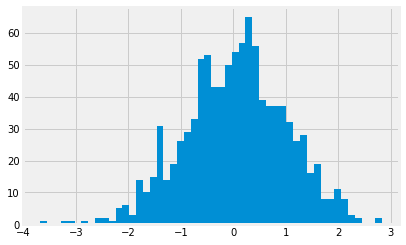

In [112]:
plt.hist(np.random.randn(1000), bins =50)

In [111]:
np.random.seed

<function RandomState.seed>

<a id="skewness"></a>
###  Skewness
- Skewness is a measure of the asymmetry of the distribution of a random variable about its mean.
- Skewness can be positive or negative, or even undefined.
- Notice that the mean, median, and mode are the same when there is no skew.

![skewness](assets/images/skewness---mean-median-mode.jpg)

#### Plot a lognormal distribution generated with NumPy.

Take 1,000 samples using `np.random.lognormal(size=numsamples)` and plot them on a histogram.

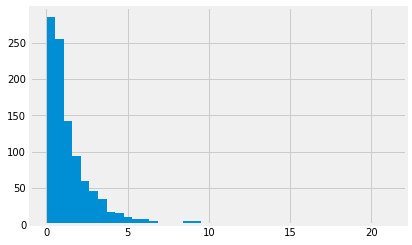

In [115]:
# Plot a lognormal distribution generated with NumPy, adding a ; to the end of the code gets rid of the array of the data
plt.hist(np.random.lognormal(size=1000), bins=40);

#####  Real World Application - When mindfullness beats complexity
- Skewness is surprisingly important.
- Most algorithms implicitly use the mean by default when making approximations.
- If you know your data is heavily skewed, you may have to either transform your data or set your algorithms to work with the median.

<a id="kurtosis"></a>
### Kurtosis
- Kurtosis is a measure of whether the data are peaked or flat, relative to a normal distribution.
- Data sets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly, and have heavy tails. 

![kurtosis](assets/images/kurtosis.jpg)

####  Real-World Application: Risk Analysis
- Long-tailed distributions with high kurtosis elude intuition; we naturally think the event is too improbable to pay attention to.
- It's often the case that there is a large cost associated with a low-probability event, as is the case with hurricane damage.
- It's unlikely you will get hit by a Category 5 hurricane, but when you do, the damage will be catastrophic.
- Pay attention to what happens at the tails and whether this influences the problem at hand.
- In these cases, understanding the costs may be more important than understanding the risks.

<a id="topic-review"></a>
## Lesson Review
---

- We covered several different types of summary statistics, what are they? Mean, Mode, Median, Max, Min
- We covered three different types of visualizations, which ones? histograms, 
- Describe bias and variance and why they are important.
- What are some important characteristics of distributions?

**Any further questions?**